## CSCI 470 Activities and Case Studies

1. For all activities, you are allowed to collaborate with a partner. 
1. For case studies, you should work individually and are **not** allowed to collaborate.

By filling out this notebook and submitting it, you acknowledge that you are aware of the above policies and are agreeing to comply with them.

Some considerations with regard to how these notebooks will be graded:

1. You can add more notebook cells or edit existing notebook cells other than "# YOUR CODE HERE" to test out or debug your code. We actually highly recommend you do so to gain a better understanding of what is happening. However, during grading, **these changes are ignored**. 
2. You must ensure that all your code for the particular task is available in the cells that say "# YOUR CODE HERE"
3. Every cell that says "# YOUR CODE HERE" is followed by a "raise NotImplementedError". You need to remove that line. During grading, if an error occurs then you will not receive points for your work in that section.
4. If your code passes the "assert" statements, then no output will result. If your code fails the "assert" statements, you will get an "AssertionError". Getting an assertion error means you will not receive points for that particular task.
5. If you edit the "assert" statements to make your code pass, they will still fail when they are graded since the "assert" statements will revert to the original. Make sure you don't edit the assert statements.
6. We may sometimes have "hidden" tests for grading. This means that passing the visible "assert" statements is not sufficient. The "assert" statements are there as a guide but you need to make sure you understand what you're required to do and ensure that you are doing it correctly. Passing the visible tests is necessary but not sufficient to get the grade for that cell.
7. When you are asked to define a function, make sure you **don't** use any variables outside of the parameters passed to the function. You can think of the parameters being passed to the function as a hint. Make sure you're using all of those variables.

# Unsupervised Learning - Clustering & Manifolds

In this exercise we will look at a variety of clustering methods including manifold-based methods.

First, we examine Agglomerative Clustering methods.

In [1]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk

%matplotlib inline
plt.style.use("ggplot")

In [2]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_completeness_v_measure, silhouette_score

We will be using the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) for this exercise.

In [3]:
iris = load_iris()
iris_features = iris["data"]
iris_targets = iris["target"]
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris_features.shape

(150, 4)

In [5]:
iris_targets.shape

(150,)

## Agglomerative Clustering

In this portion of the exercise, you will plot the dendrograms when applied to the Iris dataset. To do this, you should use the [linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) and [dendrogram](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram) functions.

In [6]:
def dendrogram_plotter(features, methods, metric):
    """Plots a dendrogram for the provided features for every method in methods using the provided metric
    
    Args:
        features (iterable): The features to use in creating the dendrogram
        methods (iterable): A list of strings where each one is a valid method to the linkage function
        metric (str): A metric for calculating the linkage
    """
    for method in methods:
        plt.figure(figsize = (10,6)) # Change the figure size to your liking
        link = linkage(features, metric=metric)
        dn = dendrogram(link);
        plt.title(f"{method.title()} Linkage Iris Dataset Dendrogram")
        plt.show()

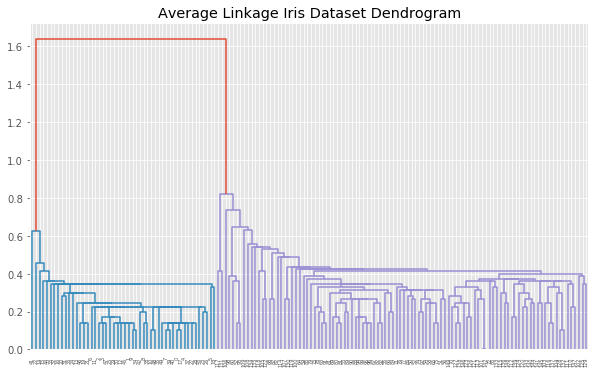

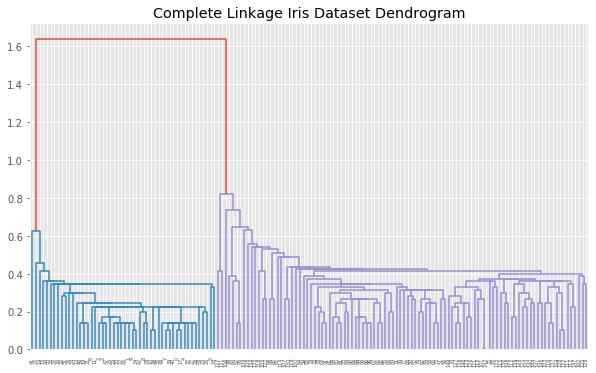

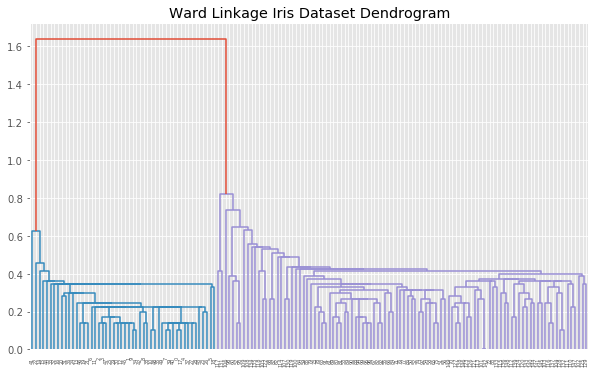

In [7]:
dendrogram_plotter(iris_features, ["average", "complete", "ward"], "euclidean")

In [8]:
def clustering_scorer(features, targets, pred):
    """Calculates some important clustering scores given a set of features, targets, and predictions
    
    Args:
        features (iterable): The input features to the clustering problem
        targets (iterable): The targets if this was a classification problem
        pred (iterable): The cluster predictions for the data samples
    
    Returns:
        dict: A dictionary with the keys ['Adjusted Rand', 'Adjusted Mutual Info', 'Homogeneity', 'Completeness', 
            'V Score', 'Silhouette Score'] and values as the respective scores for the inputs.
    """

    return dict({'Adjusted Rand':adjusted_rand_score(targets,pred), 
                   'Adjusted Mutual Info':adjusted_mutual_info_score(targets,pred), 
                   'Homogeneity':homogeneity_completeness_v_measure(targets,pred)[0], 
                   'Completeness':homogeneity_completeness_v_measure(targets,pred)[1],
                   'V Score':homogeneity_completeness_v_measure(targets,pred)[2],
                   'Silhouette Score':silhouette_score(features,targets)})

To create agglomerative clustering estimators, use [AgglomerativeClustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering). It was already imported above. Consider using the function you just created above in developing the next function as well.

In [9]:
def agg_clustering_scorer(features, targets, linkages, n_clusters=8):
    """Calculate the agglomerative clustering scores for a variety of linkage types
    
    Args:
        features (iterable): The input features of the data
        targets (iterable): The target classes if this was treated as a classification problem
        linkages (iterable): A list of linkage methods to calculate scores for
        n_clusters (int, optional): Defaults to 8. The number of clusters to use in the clustering algorithm
    
    Returns:
        iterable: Scores for each linkage method similar to the clustering_scorer method's output
    """
    
    scores = []
    for linkage in linkages:
        scores.append(clustering_scorer(features, targets, AgglomerativeClustering(n_clusters=n_clusters,linkage=linkage).fit_predict(features,targets)))
    return scores

In [10]:
aggScores = agg_clustering_scorer(iris_features, iris_targets, ["average", "complete", "ward"], n_clusters=3)

In [11]:
assert len(aggScores) == 3
for key in ['Adjusted Rand', 'Adjusted Mutual Info', 'Homogeneity', 'Completeness', 'V Score', 'Silhouette Score']:
    assert key in aggScores[0].keys()

In [12]:
for linkage, score in zip(["average", "complete", "ward"],aggScores):
    print(f"With the {linkage} linkage,")
    print(f"Adjusted rand score is {score['Adjusted Rand']}")
    print(f"Adjusted mutual info score is {score['Adjusted Mutual Info']}")
    print(f"Homogeneity is {score['Homogeneity']}, Completeness is {score['Completeness']}, V score is {score['V Score']}")
    print(f"Silhouette score is {score['Silhouette Score']}\n")

With the average linkage,
Adjusted rand score is 0.7591987071071522
Adjusted mutual info score is 0.8032287370935433
Homogeneity is 0.7959816227812412, Completeness is 0.8156456882407057, V score is 0.805693691215336
Silhouette score is 0.5034774406932957

With the complete linkage,
Adjusted rand score is 0.64225125183629
Adjusted mutual info score is 0.7184641371994781
Homogeneity is 0.7001154370964626, Completeness is 0.7454382753016932, V score is 0.7220663465703592
Silhouette score is 0.5034774406932957

With the ward linkage,
Adjusted rand score is 0.7311985567707745
Adjusted mutual info score is 0.7671669615713111
Homogeneity is 0.7608008469718723, Completeness is 0.7795958005591144, V score is 0.7700836616487869
Silhouette score is 0.5034774406932957



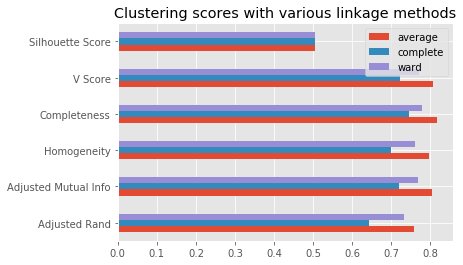

In [13]:
scoresdf = pd.DataFrame(aggScores, index=["average", "complete", "ward"]).T # Try removing the .T and see what happens
scoresdf.plot(kind="barh")
plt.title("Clustering scores with various linkage methods")
plt.show()

## Spectral Clustering

In [14]:
from sklearn.cluster import SpectralClustering

In [15]:
# Create a spectral clustering classifier saved as `clf`, using n_clusters=3.
# Fit clf to the iris data
# Predict values for the iris data using clf and save them as spectral_pred
clf = SpectralClustering(n_clusters=3)
spectral_pred = clf.fit_predict(iris_features, iris_targets)

In [16]:
spectral_scores = clustering_scorer(iris_features, iris_targets, spectral_pred)

In [17]:
for key in ['Adjusted Rand', 'Adjusted Mutual Info', 'Homogeneity', 'Completeness', 'V Score', 'Silhouette Score']:
    assert key in spectral_scores.keys()

In [18]:
assert clf.n_clusters == 3

In [19]:
if len(aggScores) == 3:
    aggScores.append(spectral_scores)

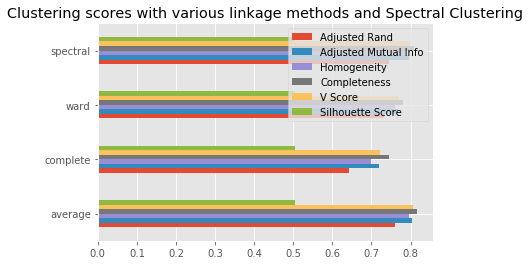

In [20]:
scoresdf = pd.DataFrame(aggScores, index=["average", "complete", "ward", "spectral"]) # Try removing the .T and see what happens
scoresdf.plot(kind="barh")
plt.title("Clustering scores with various linkage methods and Spectral Clustering")
plt.show()

## Clustering Overview

The below code is copied from http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html and is here for you to see how different methods work with varying input data. We haven't gone over all these methods and so you can focus only on what we've covered. We will go over some of the other methods in a later lecture.

C:\Users\Carson\Anaconda3\envs\NN\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)
C:\Users\Carson\Anaconda3\envs\NN\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)
C:\Users\Carson\Anaconda3\envs\NN\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every f

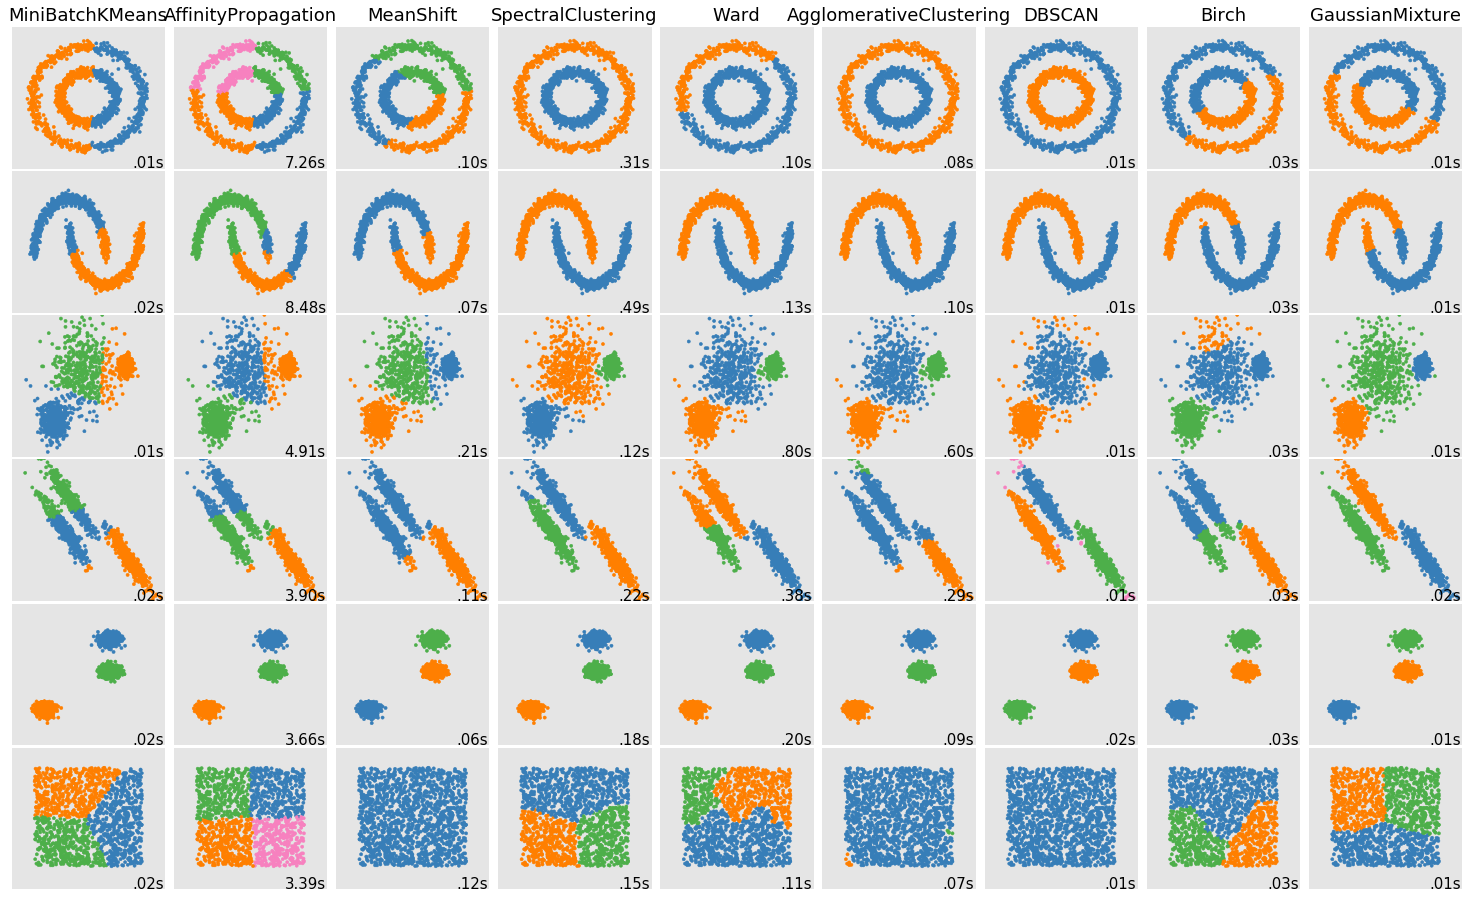

In [21]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2}),
    (aniso, {'eps': .15, 'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

## Feedback

In [23]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    return "No comments. Liked the visualization at the end."
feedback()

'No comments. Liked the visualization at the end.'